# Thông tin sinh viên
Họ và tên: Nguyen Cong Danh

MSSV: 22635131

Email: nguyencongdanh1407@gmail.com

## Nội Dung 1: Thống Kê Mô Tả

In [1]:

# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t
df = pd.read_csv("online_shopping.csv")

In [2]:
print("a")

a


### Câu 1 (2đ): Thực hiện thống kê mô tả cơ bản cho toàn bộ dữ liệu số

In [9]:
df_so = df.select_dtypes(include=['number'])
print("Trung binh toan bo du lieu so:\n",df_so.mean())


Trung binh toan bo du lieu so:
 age                     43.492709
membership_duration     29.987480
purchase_frequency       5.251530
average_purchase       105.068552
total_spend            551.814279
discount_used            2.623184
satisfaction_score       5.923066
dtype: float64


In [8]:
print("Trung vi toan bo du lieu so:\n",df_so.median())


Trung vi toan bo du lieu so:
 age                     43.00
membership_duration     30.00
purchase_frequency       5.30
average_purchase       105.06
total_spend            430.94
discount_used            2.00
satisfaction_score       5.90
dtype: float64


In [13]:
print("Do lech chuan toan bo du lieu so:\n",df_so.std())


Do lech chuan toan bo du lieu so:
 age                     15.005661
membership_duration     17.024422
purchase_frequency       2.742120
average_purchase        54.880316
total_spend            441.949543
discount_used            1.565641
satisfaction_score       0.938424
dtype: float64


In [11]:
print("Max toan bo du lieu so:\n",df_so.max())


Max toan bo du lieu so:
 age                      69.00
membership_duration      59.00
purchase_frequency       10.00
average_purchase        200.00
total_spend            2391.46
discount_used             7.00
satisfaction_score        9.90
dtype: float64


In [12]:
print("Min toan bo du lieu so:\n",df_so.min())

Min toan bo du lieu so:
 age                    18.00
membership_duration     1.00
purchase_frequency      0.50
average_purchase       10.00
total_spend             4.04
discount_used           0.00
satisfaction_score      4.00
dtype: float64


### Câu 2 (1đ): Tính trung bình tổng chi tiêu và mức độ hài lòng theo giới tính và thành phố

In [18]:
# Trung bình theo giới tính
print("Trung binh tong chi tieu theo gioi tinh  :\n", df.groupby('gender')[['total_spend','satisfaction_score']].mean() )
# Trung bình theo thành phố
print("Trung binh tong chi tieu theogioi tinh va thanh pho :\n", df.groupby('city')[['total_spend','satisfaction_score']].mean() )

Trung binh tong chi tieu theo gioi tinh  :
         total_spend  satisfaction_score
gender                                 
Female   551.307537            5.922013
Male     552.321148            5.924120
Trung binh tong chi tieu theogioi tinh va thanh pho :
              total_spend  satisfaction_score
city                                        
Cần Thơ       550.867154            5.922513
Hà Nội        552.580568            5.924455
Hải Phòng     551.969416            5.923986
Hồ Chí Minh   551.133757            5.922149
Nha Trang     551.852873            5.920833
Đà Nẵng       552.481037            5.924463


### Câu 3 (1đ): Vẽ biểu đồ phân tán thể hiện mối quan hệ giữa tần suất mua hàng và tổng chi tiêu

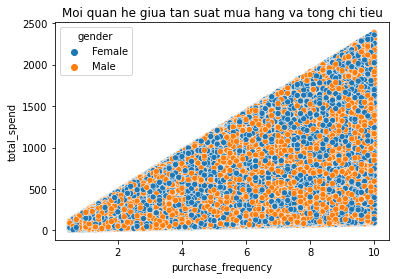

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x= 'purchase_frequency', y ='total_spend', hue='gender')
plt.title("Moi quan he giua tan suat mua hang va tong chi tieu")
plt.show()

### Câu 4 (1đ): Vẽ biểu đồ cột thể hiện điểm hài lòng trung bình theo từng nhóm tuổi

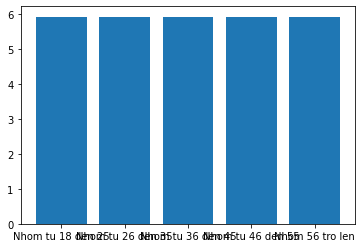

In [6]:
# 18-25, 26-35, 36-45, 46-55, 56+
nhom18_25 = df[df['age'] >= 18 ]
nhom18_25 = df[df['age'] <= 25 ]
nhom18_25 = nhom18_25['satisfaction_score'].mean()

nhom26_35 = df[df['age'] >= 26 ]
nhom26_35 = df[df['age'] <= 35 ]
nhom26_35 = nhom26_35['satisfaction_score'].mean()

nhom36_45 = df[df['age'] >= 36 ]
nhom36_45 = df[df['age'] <= 45 ]
nhom36_45 = nhom36_45['satisfaction_score'].mean()

nhom46_55 = df[df['age'] >= 46 ]
nhom46_55 = df[df['age'] <= 55 ]
nhom46_55 = nhom46_55['satisfaction_score'].mean()

nhom56 = df[df['age']>= 56]
nhom56 = nhom56['satisfaction_score'].mean()

y = np.array([nhom18_25, nhom26_35, nhom36_45, nhom46_55, nhom56])
x = np.array(["Nhom tu 18 den 25","Nhom tu 26 den 35", "Nhom tu 36 den 45","Nhom tu 46 den 55", "Nhom 56 tro len"])
plt.bar(x,y)
plt.show()

## Nội Dung 2: Phân Phối Xác Suất

### Câu 1 (1.5đ): Tính xác suất có ít nhất 30 người thực hiện giao dịch mua hàng

In [20]:
p = 8/100 #voi p = 8/100 la  xac suat thuc hien giao dich
n = 300 # voi n = 300 la so luong 300 khach hang trong 1 ngay 
print("Xac suat co it nhat 30 nguoi thuc hien giao dich mua hang :", 1- binom.cdf(29, n,p))

Xac suat co it nhat 30 nguoi thuc hien giao dich mua hang : 0.12264114453192332


### Câu 2 (1.5đ): Tính xác suất người dùng lưu lại từ 6 đến 8 phút

In [21]:
mu,sigma = 5, 1.2 # voi mu = 5 la trung binh thoi gian mot nguoi luu lai, sigma = 1.2 la do lech chuan giua cac thoi gian luu lai
print("Xac suat mot nguoi dung ngau nhien luu lai tu 6 den 8 phut :",norm.cdf(8, mu , sigma) - norm.cdf(6, mu , sigma))

Xac suat mot nguoi dung ngau nhien luu lai tu 6 den 8 phut : 0.19611871563786698


### Câu 3 (2đ): Tính xác suất đăng ký nhận bản tin

In [3]:
p = 25/100 # xac suat mot khach hang nhan ban tin dang ky la 25%
n = 40 # trong mau 40 nguoi 
print("Xac suat co dung 12 nguoi dang ky nhan ban tin :", binom.pmf(12, n , p))
print("Xac suat co it nhat 15 nguoi dang ky nhan ban tin :",binom.sf(14, n , p))


Xac suat co dung 12 nguoi dang ky nhan ban tin : 0.10572136475584355
Xac suat co it nhat 15 nguoi dang ky nhan ban tin : 0.05443724801863485
